**DATA ANALYSIS CASE STUDY - TITANIC DATASET**

**Description about dataset -** 
> The titanic and titanic2 data frames describe the survival status of individual passengers on the Titanic. 

**Columns Description -**

> 1.   **PassengerId** - Unique id.
2.   **Survived**	- 0 for No, 1 for Yes.
3.   **Pclass**	- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
4.   **Name**	- Name of the passenger.
5.   **Sex**	- Gender of the passenger.
6.   **Age**	- Age of the passenger.
7.   **SibSp** - Number of Siblings/Spouses Aboard
8.   **Parch** - Number of Parents/Children Aboard
9.   **Ticket**	- Ticket Number
10.  **Fare**	- Ticket Fare
11.  **Cabin** - Cabin number
12.  **Embarked** - Which Port (C = Cherbourg; Q = Queenstown; S = Southampton)

**Aim -** 
> To find factors influencing the survival chance.







#**1. Importing Libraries and dataset**

In [1]:
#Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [2]:
#Connecting google drive with colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#Reading dataset and saving it in df
df = pd.read_csv('/content/drive/MyDrive/2. Journey/8. Data Analyst/Case Study 1 : Titanic Data/titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#**2. Data Pre-Processing**

**2.1 General Analysis**

In [4]:
#Dimension
df.shape

(418, 12)

In [5]:
#To view how many duplicate records.
df.duplicated().sum()

0

In [6]:
#Give number of unique values.
df.nunique()

#Aim - Checking on few things :
#        1. passengerId must be unique ✅
#        2. survived column must have only 2 distinct values ✅
#        3. Pclass column must have only 3 distinct values ✅
#        4. Sex column must have only 2 distinct values ✅
#        5. Embarked column must have only 3 distinct values ✅

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [7]:
#Number of null values in each column
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
#Deleting PassengerId, Name, Ticket & Cabin as they all are categorical variable with large number of distinct values.
#Cabin has 327 null values, hence deleting
df = df.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin'])
df.shape

(418, 8)

In [9]:
#To know the datatype of features and null values.
df.info()

#Aim - Checking on few things :
#        1. Datatypes correct? ❌  --->   Doubt on : Survived(category), Pclass(category), Sex (category), Age (int64), Embarked (category) 
#        2. Any Null value? ✅  ---> Age, Fare

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [10]:
#Changing Data type except Age as it contain Null values
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Embarked']=df['Embarked'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  418 non-null    category
 1   Pclass    418 non-null    category
 2   Sex       418 non-null    category
 3   Age       332 non-null    float64 
 4   SibSp     418 non-null    int64   
 5   Parch     418 non-null    int64   
 6   Fare      417 non-null    float64 
 7   Embarked  418 non-null    category
dtypes: category(4), float64(2), int64(2)
memory usage: 15.3 KB


In [11]:
#Give data summary
df.describe()

#Aim - Analyzing continous variable. 
#        1. Age - Min is 0.17 ❗
#                 Max is quite large than 75 percentile ❗
#        2. Fare - Min is 0.00, not sure why ❗
#                  Max is quite large than 75 percentile ❗

,Age,SibSp,Parch,Fare
count,332.000000,418.000000,418.000000,417.000000
mean,30.272590,0.447368,0.392344,35.627188
std,14.181209,0.896760,0.981429,55.907576
min,0.170000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,27.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.500000
max,76.000000,8.000000,9.000000,512.329200


**2.2 Analysing Age and filling null values -**

In [12]:
#Analysing age
df['Age'].value_counts()  # Have float values
df['Age'] = df['Age'].fillna(-1).apply(np.ceil).astype('int64')
df['Age']

#result datatype changes to int and NAN filled with -1.

0      35
1      47
2      62
3      27
4      22
       ..
413    -1
414    39
415    39
416    -1
417    -1
Name: Age, Length: 418, dtype: int64

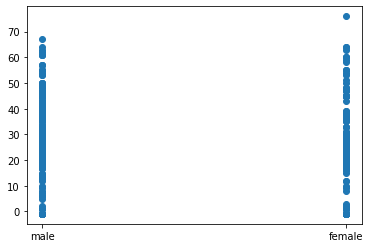

In [13]:
#Analysing trend between gender and age
plt.scatter(df['Sex'], df['Age'])

#result - Outlier if age > 65

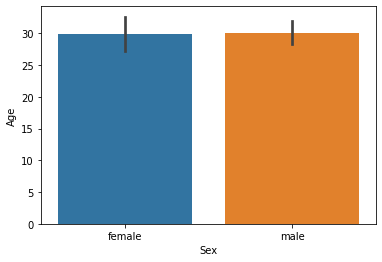

In [14]:
#Analysing average age of Male and Female
df['Age'] = np.where(df['Age'] > 65, -1, df['Age'])
sns.barplot(x ='Sex', y ='Age', data = df[df['Age']>0], estimator = np.mean) 

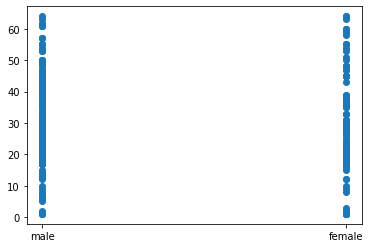

In [15]:
#Filling null values with average age.
df['Age'] = np.where(df['Age'] == -1, 30, df['Age'])
plt.scatter(df['Sex'], df['Age'])

**2.3 Analysing Fare and filling null values -**

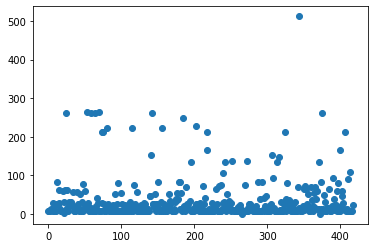

In [16]:
#Scatter plot for Fare
plt.scatter(df.index,df['Fare'])

#result - outlier if fare > 300

In [17]:
#Assuming - Fare = 0.00 is wrong data
df[(df['Fare']==0) | (df['Fare'] > 300) | (df['Fare'].isnull())]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,0,3,male,61,0,0,NaN,S
266,0,1,male,30,0,0,0.0000,S
343,1,1,female,58,0,1,512.3292,C
372,0,1,male,49,0,0,0.0000,S


In [18]:
#Analyzing only clean data
data = df[(df['Fare']!=0) & (df['Fare']<300) & (df['Fare'].notnull())]
data.shape

(414, 8)

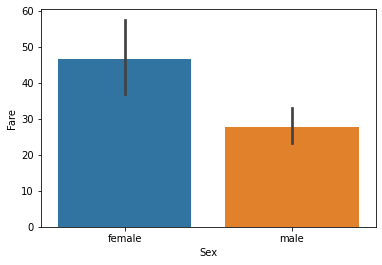

In [19]:
#Trying to find relation between fare and sex
sns.barplot(x ='Sex', y ='Fare', data = data, estimator = np.mean) 

#Female pay a lot more fare than men.

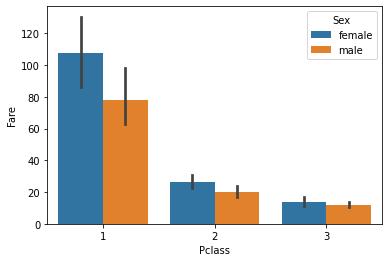

In [20]:
#Pclass is same for all 3
sns.barplot(x='Pclass', y='Fare', hue='Sex', data=data)

#Fare : 1 > 2 > 3

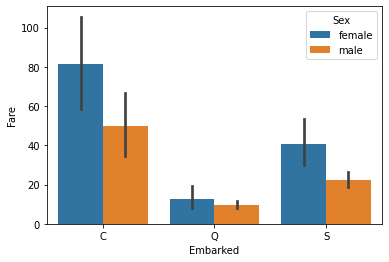

In [21]:
#Embarked is same for all 3
sns.barplot(x='Embarked', y='Fare', hue='Sex', data=data)

#Fare : C > S > Q

In [22]:
#Finding Fare mean by groupby on ['Pclass', 'Embarked', 'Sex']
df.groupby(['Pclass', 'Embarked', 'Sex']).agg({'Fare': 'mean'})

#result - NAN value is because series is empty.

Fare
Pclass Embarked Sex               
1      C        female  123.895682
                male     96.251339
       Q        female   90.000000
                male           NaN
       S        female  105.737110
                male     55.634341
2      C        female   30.040625
                male     14.451771
       Q        female         NaN
                male     11.273950
       S        female   25.884615
                male     21.641827
3      C        female   11.360950
                male     10.450626
       Q        female    9.051813
                male      8.931483
       S        female   16.825610
                male     12.718872

In [23]:
#Filling values
df.at[152,'Fare']=12.70
df.at[266,'Fare'] = 59.75
df.at[343,'Fare'] = 109.50
df.at[372,'Fare']= 59.70

#To check
df[(df['Fare']==0) | (df['Fare'] > 300) | (df['Fare'].isnull())].size

0

**Data Sanity** 

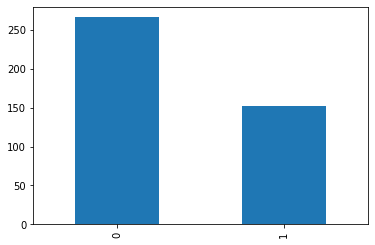

In [24]:
#Survived - Must contain 0 or 1 : Unique Value is 2 ✅ 
#Checking for ratios - 
df['Survived'].value_counts().plot(kind='bar')

#result - All ok.
#Insights - Survived people is less in number.

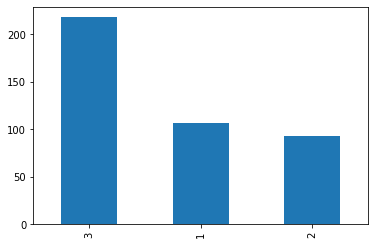

In [25]:
#Pclass - Must contain 1, 2, 3 : Unique Value is 3 ✅ 
#Checking for ratios - 
df['Pclass'].value_counts().plot(kind='bar')

#result - All ok.
#Insights - In numbers 3>1>2

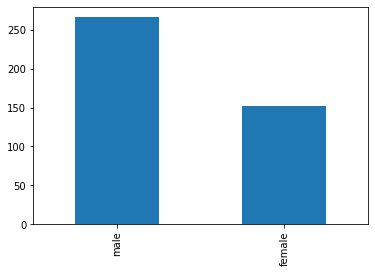

In [26]:
#Sex - Must contain male or female : Unique Value is 2 ✅ 
#Checking for ratios - 
df['Sex'].value_counts().plot(kind='bar')

#result - All ok.
#Insights - In numbers male > female

AxesSubplot(0.125,0.125;0.775x0.755)
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64


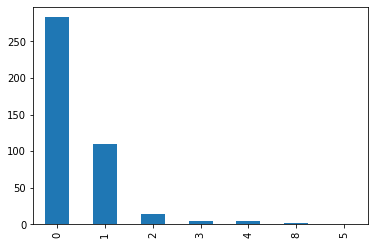

In [27]:
#SibSp - Must contain positive number ✅ 
#Checking for ratios - 
print(df['SibSp'].value_counts().plot(kind='bar'))
print(df['SibSp'].value_counts())

#result - All ok.
#Insights - Can be converted into 3 groups - 0, 1, others

AxesSubplot(0.125,0.125;0.775x0.755)
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64


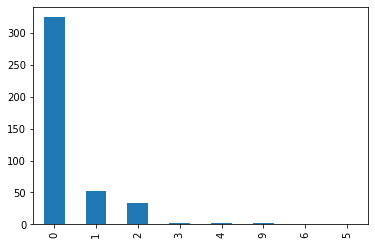

In [28]:
#Parch - Must contain positive number ✅ 
#Checking for ratios - 
print(df['Parch'].value_counts().plot(kind='bar'))
print(df['Parch'].value_counts())

#result - All ok.
#Insights - Can be converted into either (0, others) or (0, 1, 2, others).

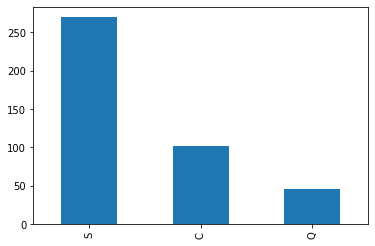

In [29]:
#Embarked - Must contain 3 category ✅ 
#Checking for ratios - 
df['Embarked'].value_counts().plot(kind='bar')

#result - All ok.
#Insights - S>C>Q

#**3. Univariate Analysis**

**3.1 Pclass & Survived**

                 Survived  Fraction
Pclass Survived                    
1      0               57  0.532710
       1               50  0.467290
2      0               63  0.677419
       1               30  0.322581
3      0              146  0.669725
       1               72  0.330275 

AxesSubplot(0.125,0.125;0.775x0.755)


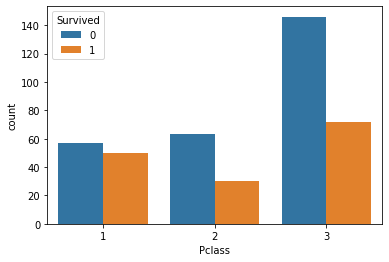

In [30]:
#Finding relation between 'Pclass' & 'Survived' columns
temp_df = df.groupby(['Pclass', 'Survived']).agg({'Survived': 'count'})
temp_df['Fraction'] = temp_df.groupby(level=0).apply(lambda x:x / float(x.sum()))
print(temp_df,'\n')

print(sns.countplot(x='Pclass', hue='Survived', data=df))

**3.2 Sex & Survived**

                 Survived  Fraction
Sex    Survived                    
female 0                0       0.0
       1              152       1.0
male   0              266       1.0
       1                0       0.0 

AxesSubplot(0.125,0.125;0.775x0.755)


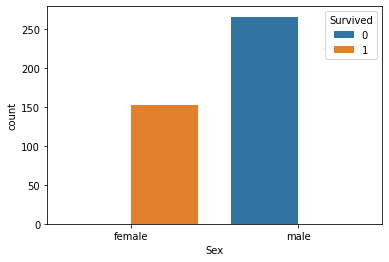

In [31]:
#Finding relation between 'Sex' & 'Survived' columns
temp_df = df.groupby(['Sex', 'Survived']).agg({'Survived': 'count'})
temp_df['Fraction'] = temp_df.groupby(level=0).apply(lambda x:x / float(x.sum()))
print(temp_df,'\n')

print(sns.countplot(x='Sex', hue='Survived', data=df))

No need to check further as Sexcolumn gives 100% result for this dataset.

#**Analysis**

According to this dataset, the **sex column** is enough to determine if the person will survive or not. 

> 1. If Male - **No**
2. If Female - **Yes**

